# EECE7150 AFR, Homework 3

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from Homography import Homography
from Mosaic import Mosaic

%load_ext autoreload
%autoreload 2

In [54]:
mosaic = Mosaic()
mosaic.read_imgs_from_folder("6Images/")

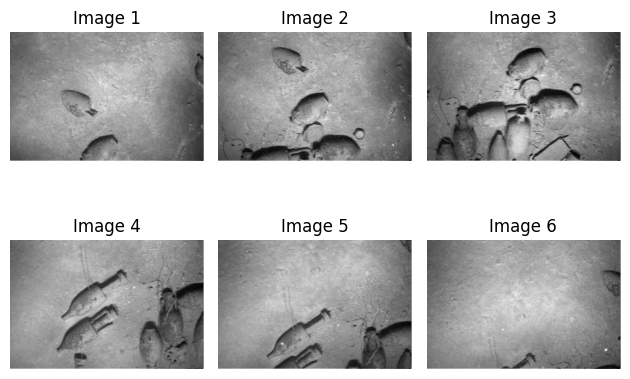

In [23]:
fig, ax = plt.subplots(2, 3)
ax = ax.flatten()
for img in range(mosaic.num_imgs_mosaic):
    ax[img].imshow(mosaic.mosaic_imgsmosaic_images_gray[img], cmap="gray")
    ax[img].axis("off")
    ax[img].set_title(f"Image {img+1}")

plt.tight_layout()
plt.show()

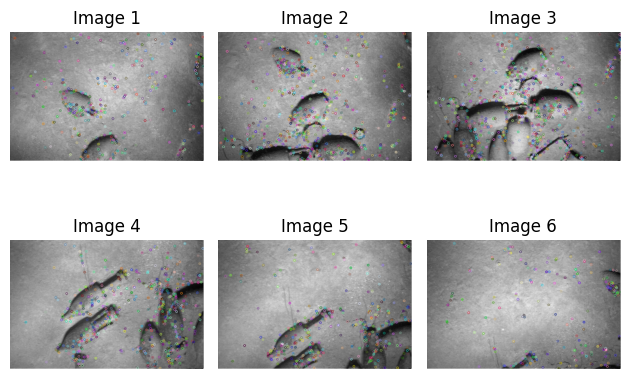

In [157]:
# orb = cv2.ORB_create(nfeatures = 2000,
#                      patchSize = 11)

orb = cv2.SIFT_create()
fig, ax = plt.subplots(2, 3)
ax = ax.flatten()

keypoints_arr = []
descriptors_arr = []

for img in range(mosaic.num_imgs_mosaic):
    keypoints, descriptors = orb.detectAndCompute(mosaic.mosaic_imgs_gray[img], None)
    keypoints_arr.append(keypoints)
    descriptors_arr.append(descriptors)

    ax[img].imshow(cv2.drawKeypoints(mosaic.mosaic_imgs_gray[img], keypoints, None))
    ax[img].axis("off")
    ax[img].set_title(f"Image {img+1}")

plt.tight_layout()
plt.show()

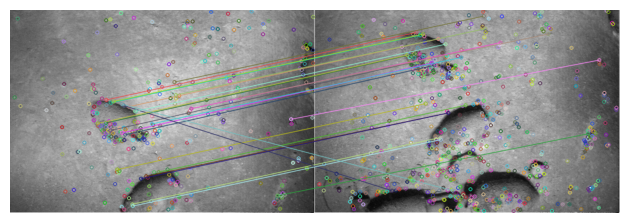

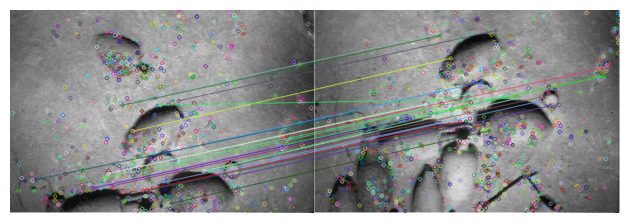

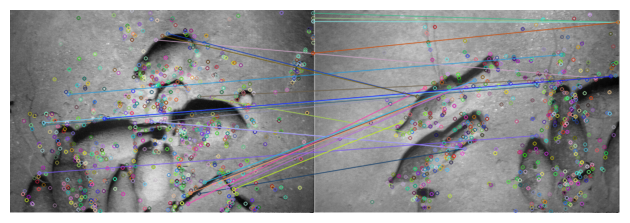

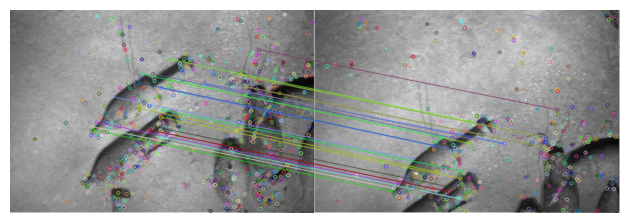

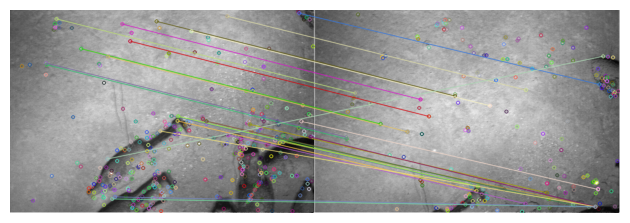

In [159]:
matcher = cv2.BFMatcher()
matches_to_display = 25
for img in range(mosaic.num_imgs_mosaic-1):
    plt.figure()
    matches = matcher.match(descriptors_arr[img], descriptors_arr[img+1])
    matches = sorted(matches, key = lambda x:x.distance)

    matches_img = cv2.drawMatches(mosaic.mosaic_imgs_gray[img],
                                keypoints_arr[img],
                                mosaic.mosaic_imgs_gray[img+1],
                                keypoints_arr[img+1],
                                matches[:matches_to_display],
                                None)
    
    plt.imshow(matches_img)
    plt.axis('off')
    plt.tight_layout()

In [150]:
src_pts = np.float32([keypoints_arr[-2][m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints_arr[-1][m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

In [155]:
np.max(src_pts, axis=0)

array([[541., 342.]], dtype=float32)

In [156]:
src_pts.reshape(-1,2)/mosaic.img_shape[0]

array([[0.8333333 , 0.5677083 ],
       [0.82125   , 0.5325    ],
       [0.7473958 , 0.8020833 ],
       [0.44010416, 0.8723958 ],
       [1.3515625 , 0.7213542 ],
       [0.6588542 , 0.6927083 ],
       [0.671875  , 0.6432292 ],
       [0.17447917, 0.26302084],
       [0.711     , 0.8145001 ],
       [1.1223959 , 0.7552083 ],
       [0.44791666, 0.8697917 ],
       [0.63437504, 0.6375    ],
       [0.75937504, 0.26562503],
       [1.1328125 , 0.71875   ],
       [0.671875  , 0.64375   ],
       [0.79062504, 0.56250006],
       [0.8656251 , 0.57187504],
       [1.2687501 , 0.8187501 ],
       [0.72      , 0.53625005],
       [0.8235001 , 0.53550005],
       [0.62208015, 0.62208015],
       [1.1796875 , 0.515625  ],
       [1.1536459 , 0.515625  ],
       [1.1340002 , 0.7020001 ],
       [1.1536459 , 0.6796875 ],
       [0.6979167 , 0.6770833 ],
       [0.8072917 , 0.609375  ],
       [1.4088541 , 0.7135417 ],
       [0.17500001, 0.26250002],
       [1.1437501 , 0.31875   ],
       [1.

In [151]:
h = Homography()
h.num_points = len(src_pts)
h.calculate_homography(src_pts.reshape(-1,2)/mosaic.img_shape[0], 
                       src_pts.reshape(-1,2)/mosaic.img_shape[0])

TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'

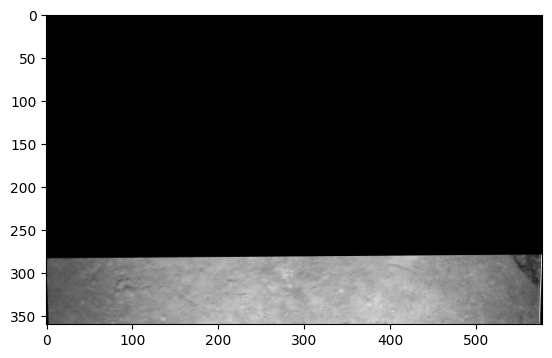

In [149]:
min_x, min_y, max_x, max_y = mosaic.calculate_min_max_coordinates(np.array([H]))
T = np.array([[1, 0, abs(min_x)],
              [0, 1, abs(min_y)],
              [0, 0,       1   ]])
plt.imshow(cv2.warpPerspective(mosaic.mosaic_imgs_gray[-2], T@H, (int(max_x-min_x), int(max_y-min_y))), cmap="gray")